# SNAP demo: Sentinel-3 LST binning

### Importing and installing libraries

In [1]:
import os
import sys
import time
from subprocess import Popen, PIPE, STDOUT
import glob
import shutil
from datetime import datetime
!pip install rasterio
import rasterio
from rasterio.plot import show
import getpass
!pip install folium
import folium

## Defining folder variables

In [2]:
#tmpfolder='/home/jovyan/work'
#folder=tmpfolder

os.environ["LD_LIBRARY_PATH"] = "."
HOME = os.getenv('HOME')
TMPDIR= os.getenv('TMPDIR')
if TMPDIR is None:
    TMPDIR=HOME+'/work'
    
now = datetime.now()
bar_message='######################################'
current_time=now.strftime("%Y%m%dT%H%M%S")
if len(sys.argv) <2:
    print("###########################################################")
    print("This script will generate Sentinel-3 Level 3 LST products")
    print("Usage: "+sys.argv[0]+" inputfile1 inputfile2 .. inputfileN")
    sys.exit(0)
WORKDIR=os.getenv("WORKDIR")
if WORKDIR is None:
    workdir=TMPDIR
os.chdir(workdir)
os.environ["LD_LIBRARY_PATH"] = "."
outputpath=HOME
graphxml='/tmp/binning_template_LST.xml'
graph2run=workdir+'/graph2run.xml'
outlog=workdir+'/s3_level3_proc_stdout-'+current_time+'.log'
out_file = open(outlog, 'a')
GPT='/tmp/snap/bin/gpt'
CACHE='30G'
CPU='16'


# Selecting and defining the input data to use

In [3]:
# INPUT ARRAY EUROPE ASCENDING 2020/09/03
inputarray='S3B_SL_2_LST____20200903T225317_20200903T225617_20200905T043434_0179_043_087_0540_LN2_O_NT_004.SEN3,S3B_SL_2_LST____20200903T225017_20200903T225317_20200905T043427_0179_043_087_0360_LN2_O_NT_004.SEN3,S3A_SL_2_LST____20200903T215741_20200903T220041_20200905T043827_0179_062_229_0900_LN2_O_NT_004.SEN3,S3A_SL_2_LST____20200903T215441_20200903T215741_20200905T043820_0179_062_229_0720_LN2_O_NT_004.SEN3,S3A_SL_2_LST____20200903T215141_20200903T215441_20200905T043813_0180_062_229_0540_LN2_O_NT_004.SEN3,S3A_SL_2_LST____20200903T214841_20200903T215141_20200905T043805_0179_062_229_0360_LN2_O_NT_004.SEN3,S3B_SL_2_LST____20200903T211818_20200903T212118_20200905T030532_0179_043_086_0900_LN2_O_NT_004.SEN3,S3B_SL_2_LST____20200903T211518_20200903T211818_20200905T030525_0179_043_086_0720_LN2_O_NT_004.SEN3,S3B_SL_2_LST____20200903T211218_20200903T211518_20200905T030518_0179_043_086_0540_LN2_O_NT_004.SEN3,S3B_SL_2_LST____20200903T210918_20200903T211218_20200905T030512_0179_043_086_0360_LN2_O_NT_004.SEN3,S3A_SL_2_LST____20200903T201642_20200903T201942_20200905T015908_0179_062_229_0900_LN2_O_NT_004.SEN3,S3A_SL_2_LST____20200903T201342_20200903T201642_20200905T015901_0179_062_229_0720_LN2_O_NT_004.SEN3,S3A_SL_2_LST____20200903T201042_20200903T201342_20200905T015854_0180_062_229_0540_LN2_O_NT_004.SEN3,S3A_SL_2_LST____20200903T201042_20200903T201342_20200905T015854_0180_062_229_0540_LN2_O_NT_004.SEN3,S3B_SL_2_LST____20200903T193719_20200903T194019_20200905T013658_0179_043_085_0900_LN2_O_NT_004.SEN3,S3B_SL_2_LST____20200903T193419_20200903T193719_20200905T013651_0179_043_085_0720_LN2_O_NT_004.SEN3,S3B_SL_2_LST____20200903T193119_20200903T193419_20200905T013644_0179_043_085_0540_LN2_O_NT_004.SEN3,S3B_SL_2_LST____20200903T192819_20200903T193119_20200905T013637_0179_043_085_0360_LN2_O_NT_004.SEN3,S3A_SL_2_LST____20200903T183542_20200903T183842_20200905T001452_0179_062_227_0900_LN2_O_NT_004.SEN3,S3A_SL_2_LST____20200903T183242_20200903T183542_20200905T001445_0179_062_227_0720_LN2_O_NT_004.SEN3,S3A_SL_2_LST____20200903T182942_20200903T183242_20200905T001439_0179_062_227_0540_LN2_O_NT_004.SEN3'
# INPUT ARRAY EUROPE DESCENDING 2020/09/03 (19 Sentinel-3 products)
inputarray='S3A_SL_2_LST____20200903T103746_20200903T104046_20200904T153926_0180_062_222_2520_LN2_O_NT_004.SEN3,S3A_SL_2_LST____20200903T103446_20200903T103746_20200904T153917_0179_062_222_2340_LN2_O_NT_004.SEN3,S3A_SL_2_LST____20200903T103146_20200903T103446_20200904T153908_0179_062_222_2160_LN2_O_NT_004.SEN3,S3A_SL_2_LST____20200903T102846_20200903T103146_20200904T153901_0179_062_222_1980_LN2_O_NT_004.SEN3,S3B_SL_2_LST____20200903T095824_20200903T100124_20200904T152814_0179_043_079_2520_LN2_O_NT_004.SEN3,S3B_SL_2_LST____20200903T095524_20200903T095824_20200904T152807_0179_043_079_2340_LN2_O_NT_004.SEN3,S3B_SL_2_LST____20200903T095224_20200903T095524_20200904T152800_0179_043_079_2160_LN2_O_NT_004.SEN3,S3B_SL_2_LST____20200903T094924_20200903T095224_20200904T152753_0179_043_079_1980_LN2_O_NT_004.SEN3,S3A_SL_2_LST____20200903T085647_20200903T085947_20200904T140808_0180_062_221_2520_LN2_O_NT_004.SEN3,S3A_SL_2_LST____20200903T085347_20200903T085647_20200904T140802_0179_062_221_2340_LN2_O_NT_004.SEN3,S3A_SL_2_LST____20200903T085047_20200903T085347_20200904T140755_0179_062_221_2160_LN2_O_NT_004.SEN3,S3A_SL_2_LST____20200903T084747_20200903T085047_20200904T140749_0179_062_221_1980_LN2_O_NT_004.SEN3,S3B_SL_2_LST____20200903T081725_20200903T082025_20200904T134734_0179_043_078_2520_LN2_O_NT_004.SEN3,S3B_SL_2_LST____20200903T081425_20200903T081725_20200904T134727_0179_043_078_2340_LN2_O_NT_004.SEN3,S3B_SL_2_LST____20200903T081125_20200903T081425_20200904T134720_0179_043_078_2160_LN2_O_NT_004.SEN3,S3B_SL_2_LST____20200903T080825_20200903T081125_20200904T134713_0179_043_078_1980_LN2_O_NT_004.SEN3,S3A_SL_2_LST____20200903T071548_20200903T071848_20200904T122035_0179_062_220_2520_LN2_O_NT_004.SEN3,S3A_SL_2_LST____20200903T071248_20200903T071548_20200904T122029_0179_062_220_2340_LN2_O_NT_004.SEN3,S3A_SL_2_LST____20200903T070948_20200903T071248_20200904T122022_0179_062_220_2160_LN2_O_NT_004.SEN3'


# SMALL SAMPLE DATASET
#INPUT ARRAY containing 5 Sentinel-3 products over Europe
#inputarray='S3B_SL_2_LST____20200903T095524_20200903T095824_20200904T152807_0179_043_079_2340_LN2_O_NT_004.SEN3,S3B_SL_2_LST____20200903T095224_20200903T095524_20200904T152800_0179_043_079_2160_LN2_O_NT_004.SEN3,S3B_SL_2_LST____20200903T095824_20200903T100124_20200904T152814_0179_043_079_2520_LN2_O_NT_004.SEN3,S3A_SL_2_LST____20200903T103146_20200903T103446_20200904T153908_0179_062_222_2160_LN2_O_NT_004.SEN3,S3A_SL_2_LST____20200903T103446_20200903T103746_20200904T153917_0179_062_222_2340_LN2_O_NT_004.SEN3'

## Define user and pass for Copernicus Open Data Hub

In [ ]:
user=input()

In [ ]:
password= getpass.getpass()

In [ ]:
#folder='/home/jovyan'
apihub = open(HOME+"/apihub.txt", "w")
n = apihub.write(user+' '+password)
apihub.close()

# Downloading the data from Copernicus Open Data Hub and creating graph xml

In [ ]:
print(bar_message)
out_file.write(bar_message+'\n')
message='Discovering the data...'
print(message)
out_file.write(message+'\n')
#inputarray=sys.argv[1]
print(len(inputarray.split(',')))
inputs=['nofile']
for n in range(1,len(inputarray.split(','))+1):
    inputs.append(inputarray.split(',')[n-1])
    print(inputs[n])
    if inputs[n].startswith("S3") and inputs[n].endswith('.SEN3'):
        filename=inputs[n]
        day1=filename.split('SL_2_LST____')[1][0:8]
        day2=now.strftime("%Y%m%d")
        print('-----------------------------------------')
        print('['+str(n)+']: Downloading file '+filename)
        args = ["python","/tmp/Sentinel_download.py",'-a',HOME+'/apihub.txt','-s',filename,'-d',str(day1),'-f',str(day2) ]
        print(args)
        process = Popen(args,  stdout=PIPE, stderr=STDOUT)
        r=b""
        for line in process.stdout:
            r= line
            print(str(line))
            out_file.write(str(line)+'\n')
        process.wait()
        args = ["unzip",os.path.join(workdir,filename+'.zip')]
        process = Popen(args, stdout=PIPE, stderr=STDOUT)
        r=b""
        for line in process.stdout:
            r+=line
            print(str(line))
            out_file.write(str(line)+'\n')
            process.wait()
            inputs[n]=workdir+'/'+filename
            print('downloaded and unzipped file :')
        print(inputs[n])

    for filename in glob.iglob(inputs[n]+'/**/xfdumanifest.xml',recursive=True):
      inputs[n]=os.path.dirname(filename)
      if n==1:
        inputpaths=inputs[n]
      else:
        inputpaths=inputpaths+','+inputs[n]
k=0

#timeslist=list()
timeslist=[]

for file in inputpaths.split(','):
    name=os.path.basename(file)
    timeslist.append(name[16:47])
    if k==0:
        fileList=file+'/xfdumanifest.xml'
        pathList=file
    else:
        fileList=fileList+','+file+'/xfdumanifest.xml'
        pathList=pathList+','+(file)
    k=k+1
    message='['+str(k)+']:'+file
    print(message)
    out_file.write(message+'\n')
total=k
message='Total input files found :'+str(total)
print(message)
out_file.write(message+'\n')
sortedlist=sorted(timeslist)
timestart=sortedlist[0][0:15]
timestop=sortedlist[-1][16:31]




# Creating graph xml to execute

In [12]:
k=0
n=1
timeslist=[]
inputpaths=""
inputs=['nofile']
for n in range(1,len(inputarray.split(','))+1):
    inputs.append(inputarray.split(',')[n-1])
    print(inputs[n])
    for filename in glob.iglob(workdir+'/'+inputs[n]+'/**/xfdumanifest.xml',recursive=True):
        inputs[n]=os.path.dirname(filename)
        if n==1:
            inputpaths=inputs[n]
        else:
            inputpaths=inputpaths+','+inputs[n]

for file in inputpaths.split(','):
    name=os.path.basename(file)
    timeslist.append(name[16:47])
    if k==0:
        fileList=file+'/xfdumanifest.xml'
        pathList=file
    else:
        fileList=fileList+','+file+'/xfdumanifest.xml'
        pathList=pathList+','+(file)
    k=k+1
    message='['+str(k)+']:'+file
    print(message)
    out_file.write(message+'\n')
total=k
message='Total input files found :'+str(total)
print(message)
out_file.write(message+'\n')
sortedlist=sorted(timeslist)
timestart=sortedlist[0][0:15]
timestop=sortedlist[-1][16:31]

print(bar_message)
out_file.write(bar_message+'\n')
message='Creating Sentinel-3 Level 3 LST product'
print(message)
out_file.write(message+'\n')
message='Start time:'+timestart
print(message)
out_file.write(message+'\n')
message='Stop time:'+timestop
print(message)
out_file.write(message+'\n')

outputname=workdir+'/S3_L3_LST_'+timestart+'_'+timestop
message='Generating file:'
print(message)
out_file.write(message+'\n')
print(outputname)
out_file.write(outputname+'\n')
with open(graphxml, 'r') as file :
    filedata = file.read()
# Replace the target string
filedata = filedata.replace('INPUTFILES', fileList)
filedata = filedata.replace('OUTPUTNAME',outputname)
filedata = filedata.replace('BANDX','LST')
filedata = filedata.replace('INPUTPATHS', pathList)

# # Write the file out again
with open(graph2run, 'w') as file:
    file.write(filedata)

## Visualising graph to execute    
print("############################")
print("Visualising graph xml to execute")
with open(graph2run, 'r') as fin:
    print(fin.read())
    
   

S3A_SL_2_LST____20200903T103746_20200903T104046_20200904T153926_0180_062_222_2520_LN2_O_NT_004.SEN3
S3A_SL_2_LST____20200903T103446_20200903T103746_20200904T153917_0179_062_222_2340_LN2_O_NT_004.SEN3
S3A_SL_2_LST____20200903T103146_20200903T103446_20200904T153908_0179_062_222_2160_LN2_O_NT_004.SEN3
S3A_SL_2_LST____20200903T102846_20200903T103146_20200904T153901_0179_062_222_1980_LN2_O_NT_004.SEN3
S3B_SL_2_LST____20200903T095824_20200903T100124_20200904T152814_0179_043_079_2520_LN2_O_NT_004.SEN3
S3B_SL_2_LST____20200903T095524_20200903T095824_20200904T152807_0179_043_079_2340_LN2_O_NT_004.SEN3
S3B_SL_2_LST____20200903T095224_20200903T095524_20200904T152800_0179_043_079_2160_LN2_O_NT_004.SEN3
S3B_SL_2_LST____20200903T094924_20200903T095224_20200904T152753_0179_043_079_1980_LN2_O_NT_004.SEN3
S3A_SL_2_LST____20200903T085647_20200903T085947_20200904T140808_0180_062_221_2520_LN2_O_NT_004.SEN3
S3A_SL_2_LST____20200903T085347_20200903T085647_20200904T140802_0179_062_221_2340_LN2_O_NT_004.SEN3


# Launching SNAP with graph xml

In [13]:
## Logging
print(bar_message)
out_file.write(bar_message+'\n')
message='Launching OGC ESA App'
print(message)
out_file.write(message+'\n')
message='Sentinel-3 Level 3 product generation'
print(message)
out_file.write(message+'\n')
current_time = now.strftime("%Y/%m/%d-%H:%M:%S")
message='Time: '+current_time
print(message)
out_file.write(message+'\n')
print(bar_message)

## Executing SNAP with graph xml
args = [ GPT, graph2run, '-c', CACHE, '-q', CPU]
print(args)
out_file.write(str(args)+'\n')
# launching the process
timeStarted = time.time()
process = Popen(args, stdout=PIPE, stderr=STDOUT)
r = b""
for line in process.stdout:
    r += line
    print(str(line))
    out_file.write(str(line)+'\n')
process.wait()
timeDelta = time.time() - timeStarted     # Get execution time.
print('Finished process in '+str(timeDelta)+' seconds.')
out_file.write('Finished process in '+str(timeDelta)+' seconds.\n')
if process.returncode != 0 :
    message='Error creating L3 LST'
    out_file.write(message)
else: 
    message='L3 band LST successfully completed.'
    print( message)
    print(bar_message)
    out_file.write(message+'\n')
    if os.path.exists(outputname+'.dim'):
        os.remove(outputname+'.dim')
    if os.path.exists(outputname+'.data') and os.path.isdir(outputname+'.data'):
        shutil.rmtree(outputname+'.data')
    source=outputname+'.tif'
    destination=outputpath+'/'+os.path.basename(outputname)+'.tif'
print(bar_message)
out_file.write(bar_message+'\n')
now = datetime.now()
current_time = now.strftime("%Y/%m/%d-%H:%M:%S")
message='Time: '+current_time
print(message)
out_file.write(message+'\n')
print(bar_message)

######################################
Launching OGC ESA App
Sentinel-3 Level 3 product generation
Time: 2020/10/06-11:34:10
######################################
['/tmp/snap/bin/gpt', '/home/jovyan/work/graph2run.xml', '-c', '30G', '-q', '16']
b'INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters\n'
b'INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP experience.\n'
b'Executing processing graph\n'
b'INFO: org.esa.snap.binning.operator.BinningOp: expanding sourceProductPaths wildcards.\n'
b'INFO: org.esa.snap.binning.operator.BinningOp: found 19 product files.\n'
b'INFO: org.esa.snap.binning.operator.BinningOp: /home/jovyan/work/S3A_SL_2_LST____20200903T070948_20200903T071248_20200904T122022_0179_062_220_2160_LN2_O_NT_004.SEN3\n'
b'INFO: org.esa.snap.binning.operator.BinningOp: /home/jovyan/work/S3A_SL_2_LST____20200903T071248_20200903T071548_20200904T122029_0179_062_220_23

# Creating metadata output file

In [14]:
# Creating metadata output file
source=glob.glob('/home/jovyan/work/*tif')[0]
#source=outputname+'.tif'

print(source)
# Creating metadata output file
destination=source
properties=destination+'.properties'
src=rasterio.open(destination)
BBOX=src.bounds
print(BBOX)
print(src.transform)
xres=src.transform[0]
print(xres)
files=""
n=0


files=""
n=0
for name in inputpaths.split(','):
    if n==0:
        files=str(n+1)+' :'+os.path.basename(name)
    else:
        files=files+'\n'+str(n+1)+' :'+os.path.basename(name)
    n=n+1
print(files)


/home/jovyan/work/S3_L3_LST_20200903T070948_20200903T104046.tif
BoundingBox(left=-16.583333333333343, bottom=18.16666666666667, right=59.833333333333314, top=63.0)
| 0.08, 0.00,-16.58|
| 0.00,-0.08, 63.00|
| 0.00, 0.00, 1.00|
0.08333333333333333
1 :S3A_SL_2_LST____20200903T103746_20200903T104046_20200904T153926_0180_062_222_2520_LN2_O_NT_004.SEN3
2 :S3A_SL_2_LST____20200903T103446_20200903T103746_20200904T153917_0179_062_222_2340_LN2_O_NT_004.SEN3
3 :S3A_SL_2_LST____20200903T103146_20200903T103446_20200904T153908_0179_062_222_2160_LN2_O_NT_004.SEN3
4 :S3A_SL_2_LST____20200903T102846_20200903T103146_20200904T153901_0179_062_222_1980_LN2_O_NT_004.SEN3
5 :S3B_SL_2_LST____20200903T095824_20200903T100124_20200904T152814_0179_043_079_2520_LN2_O_NT_004.SEN3
6 :S3B_SL_2_LST____20200903T095524_20200903T095824_20200904T152807_0179_043_079_2340_LN2_O_NT_004.SEN3
7 :S3B_SL_2_LST____20200903T095224_20200903T095524_20200904T152800_0179_043_079_2160_LN2_O_NT_004.SEN3
8 :S3B_SL_2_LST____20200903T09492

# Writing properties file

In [15]:
### Writing properties file
file1 = open(properties,"w") 
identifier='IDENTIFIER='+os.path.basename(destination)+'\n'
polygon='GEOMETRY=POLYGON (('+str(BBOX[0])+' '+str(BBOX[2])+','+str(BBOX[1])+' '+str(BBOX[2])+','+str(BBOX[1])+' '+str(BBOX[3])+','+str(BBOX[0])+' '+str(BBOX[3])+','+str(BBOX[0])+' '+str(BBOX[2])+'))\n'
pixelspacing="PIXEL_SPACING="+str(xres)+" decimal degrees\n"
starttime="BEGIN_POSITION="+timestart+"\n"
stoptime="END_POSITION="+timestop+"\n"
processor="PROCESSOR_NAME=OGC EO Apps Pilot - ESA App: Sentinel-3 Level 3 LST generation\n"
crea_time="CREATION_DATE="+current_time+'\n'
proc_meth="PROCESSING_METHOD=Spatio-temporal aggregation\n"
proc_ver="PROCESSOR_VERSON=1.2\n"
native_file="NATIVE_PRODUCT_FORMAT=Sentinel-3 Level 2 SL_2_LST\n"
description="DESCRIPTION=Spatio-temporal binning of Sentinel-3 LST products (6 bands)\n"
band1info="BAND 1=number of observations\n"
band2info="BAND 2=number of passes\n"
band3info="BAND 3=minimum LST\n"
band4info="BAND 4=maximum LST\n"
band5info="BAND 5=average LST\n"
band6info="BAND 6=sigma LST\n"
NInput="N_INPUT_FILES="+str(n)+"\n"
Files="INPUT_FILES=\n"+files
L = [identifier,polygon,pixelspacing,starttime,stoptime,processor,crea_time,proc_meth,proc_ver,native_file,description,band1info,band2info,band3info,band4info,band5info,band6info,NInput,Files] 
  
file1.writelines(L) 
file1.close()

# Creating quicklook of average LST band

In [17]:
# Create visualisation of avg LST band
s3_output=glob.glob(workdir+'/*tif')[0]
print(s3_output)

cmd=['/tmp/snap/bin/pconvert','-b','5','-c','/tmp/velocity.cpd',s3_output,'-f','png','-o',workdir]
print('Creating browse Level 3 average LST')
timeStarted = time.time()
process = Popen(cmd, stdout=PIPE, stderr=STDOUT)
r = b""
for line in process.stdout:
    r += line
    print(str(line))
    out_file.write(str(line)+'\n')
process.wait()
timeDelta = time.time() - timeStarted                     # Get execution time.
print('Finished process in '+str(timeDelta)+' seconds.')
out_file.write('Finished process in '+str(timeDelta)+' seconds.\n')
if process.returncode != 0 :
    message='Error creating L3 browse LST'
    out_file.write(message)
else:
    message='L3 browse LST average band successfully completed.'
    print( message)
    print(bar_message)

    out_file.write(message+'\n')

/home/jovyan/work/S3_L3_LST_20200903T070948_20200903T104046.tif
Creating browse Level 3 average LST
b'INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters\n'
b'INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP experience.\n'
b'reading file /home/jovyan/work/S3_L3_LST_20200903T070948_20200903T104046.tif\n'
b'INFO: org.hsqldb.persist.Logger: dataFileCache open start\n'
b'loading colour palette from: /tmp/velocity.cpd\n'
b"creating histogram for band 'LST_mean'...\n"
b'creating RGB image...\n'
b"writing RGB image to '/home/jovyan/work/S3_L3_LST_20200903T070948_20200903T104046.png'...\n"
Finished process in 9.6291184425354 seconds.
L3 browse LST average band successfully completed.
######################################


In [18]:
# Reading output png
print(s3_output[:-3]+'png')
src = rasterio.open(s3_output[:-3]+'png')


/home/jovyan/work/S3_L3_LST_20200903T070948_20200903T104046.png


/opt/conda/lib/python3.6/site-packages/rasterio/__init__.py:221: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


# Visualising output quicklook 

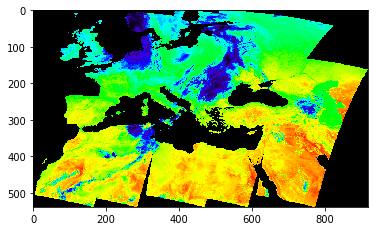

In [20]:
show(src)

# Reprojecting into Webmercator for online map visualisation

In [ ]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling

dst_crs = 'EPSG:3857'

with rasterio.open(os.path.join(workdir,s3_output)) as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rasterio.open(os.path.join(workdir,s3_output[:-4]+'_webmercator.tif'), 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)
            
## Creating the png in pseudomercator
# Create visualisation of avg LST band
s3_output=glob.glob(workdir+'/*webmercator.tif')[0]
print(s3_output)

cmd=['/tmp/snap/bin/pconvert','-b','5','-c','/tmp/velocity.cpd',s3_output,'-f','png','-o',workdir]
print('Creating browse Level 3 average LST')
timeStarted = time.time()
process = Popen(cmd, stdout=PIPE, stderr=STDOUT)
r = b""
for line in process.stdout:
    r += line
    print(str(line))
    out_file.write(str(line)+'\n')
process.wait()
timeDelta = time.time() - timeStarted                     # Get execution time.
print('Finished process in '+str(timeDelta)+' seconds.')
out_file.write('Finished process in '+str(timeDelta)+' seconds.\n')
if process.returncode != 0 :
    message='Error creating L3 browse LST'
    out_file.write(message)
else:
    message='L3 browse LST average band successfully completed.'
    print( message)
    print(bar_message)

    out_file.write(message+'\n')

/home/jovyan/work/S3_L3_LST_20200903T070948_20200903T104046_webmercator_webmercator.tif
Creating browse Level 3 average LST
b'INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters\n'
b'INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP experience.\n'
b'reading file /home/jovyan/work/S3_L3_LST_20200903T070948_20200903T104046_webmercator_webmercator.tif\n'
b'INFO: org.hsqldb.persist.Logger: dataFileCache open start\n'
b'loading colour palette from: /tmp/velocity.cpd\n'
b"creating histogram for band 'band_5'...\n"
b'creating RGB image...\n'
b"writing RGB image to '/home/jovyan/work/S3_L3_LST_20200903T070948_20200903T104046_webmercator_webmercator.png'...\n"


## Visualising output into an interactive map 

In [ ]:
## Visualising output into an interactive map 

ymin=BBOX[1]
xmin=BBOX[0]
ymax=BBOX[3]
xmax=BBOX[2]
ymean=(ymax+ymin)/2
xmean=(xmax+xmin)/2

m = folium.Map([ymean, xmean], zoom_start=4, tiles='stamenterrain',crs='EPSG3857')

merc = os.path.join(workdir, s3_output[:-3]+'png')

if not os.path.isfile(os.path.join(workdir,s3_output)):
    print(f'Could not find {merc}')
else:
    img = folium.raster_layers.ImageOverlay(
        name='S3_LST_binned',
#        image=band,
        image=merc,
        bounds=[[ymin, xmin], [ymax, xmax]],
        opacity=0.6,
        interactive=True,
        cross_origin=False,
        zindex=1,
    )

    #folium.Popup('I am an image').add_to(img)

    img.add_to(m)
    folium.LayerControl().add_to(m)
    m.save(os.path.join(HOME, 'ImageOverlay_0.html'))
m